Depart de la modelisation: Token, lemme, vectorisation simple, SVM

In [1]:
import pandas as pd
df = pd.read_csv("df_part1_traduit.csv")

df = df.drop(columns=['merged', 'lang'])
df = df[['prdtypecode', 'merged_trad', 'category_name']]
print(df.head())


   prdtypecode                                        merged_trad  \
0         2280  journal art lart marche salon dart asiatique a...   
1           50  grand stylet ergonomique bleu gamepad nintendo...   
2         1280  peluche donald europe disneyland marionnette d...   
3         2705  guerre tuques luc a ideacutees grandeur veut o...   
4         2280  afrique contemporaine hiver dossier japon afrique   

                  category_name  
0  Journaux et revues occasions  
1            Accessoires gaming  
2                 Jouets enfant  
3                  Livres neufs  
4  Journaux et revues occasions  


In [2]:
df_vecteur = df.copy()


In [3]:
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import re

# Télécharger les ressources nécessaires
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')

# Initialisation
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('french'))

# Fonction de nettoyage + tokenisation + lemmatisation
def simple_tokenize_lemmatize(text):
    text = str(text).lower()  # minuscule
    text = re.sub(r"[^a-zA-ZÀ-ÿ\s]", "", text)  # enlever la ponctuation
    tokens = nltk.word_tokenize(text, language='french')
    lemmes = [lemmatizer.lemmatize(token) for token in tokens if token not in stop_words]
    return " ".join(lemmes)

# Application
df_vecteur['merged_trad_lemmatized'] = df_vecteur['merged_trad'].apply(simple_tokenize_lemmatize)


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\dunca\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\dunca\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\dunca\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [4]:
from sklearn.feature_extraction.text import CountVectorizer

# Initialisation du vectorizer
vectorizer = CountVectorizer()

# Application sur la colonne lemmatisée
X_vect = vectorizer.fit_transform(df_vecteur['merged_trad_lemmatized'])

# Facultatif : transformer en DataFrame pour visualiser les colonnes (tokens)
X_vect_df = pd.DataFrame(X_vect.toarray(), columns=vectorizer.get_feature_names_out())

print(X_vect_df.head())


   aa  aaa  aaaa  aaabrbrcaractristiques  aaafunction  aaah  aabatteries  \
0   0    0     0                       0            0     0            0   
1   0    0     0                       0            0     0            0   
2   0    0     0                       0            0     0            0   
3   0    0     0                       0            0     0            0   
4   0    0     0                       0            0     0            0   

   aabrbrcaractristiques  aac  aaccessories  ...  étain  étirer  étoile  \
0                      0    0             0  ...      0       0       0   
1                      0    0             0  ...      0       0       0   
2                      0    0             0  ...      0       0       0   
3                      0    0             0  ...      0       0       0   
4                      0    0             0  ...      0       0       0   

   étoiles  étrangers  étui  évite  éviter  événement  être  
0        0          0     0   

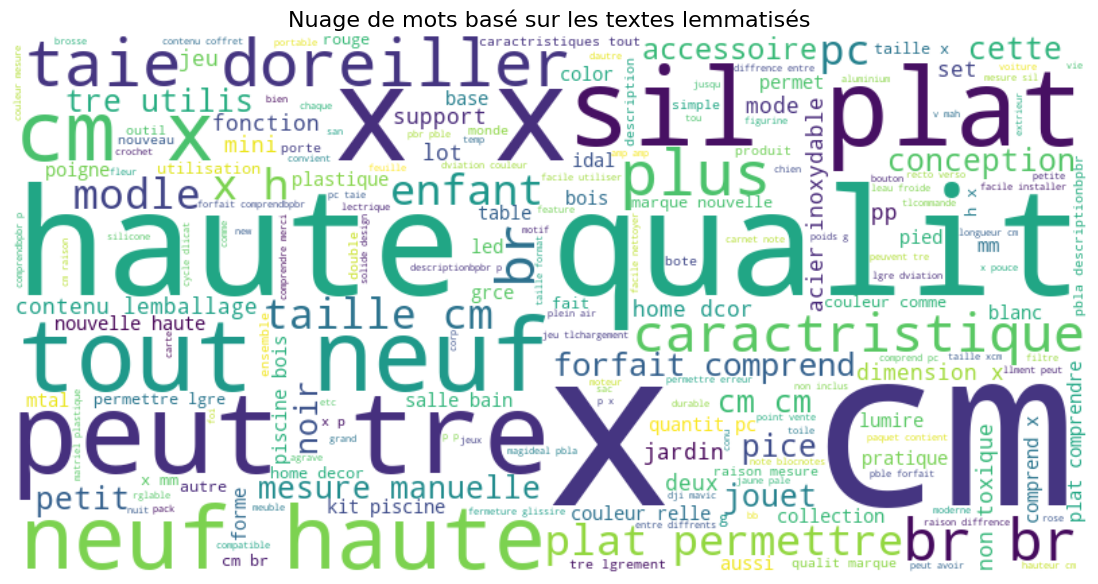

In [5]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# On concatène tous les textes lemmatisés
all_text = " ".join(df_vecteur['merged_trad_lemmatized'])

# Création du nuage
wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='viridis').generate(all_text)

# Affichage
plt.figure(figsize=(15, 7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Nuage de mots basé sur les textes lemmatisés", fontsize=16)
plt.show()


In [6]:
from sklearn.feature_extraction.text import CountVectorizer

# Initialiser le vectorizer
vectorizer = CountVectorizer()

# Appliquer sur la colonne nettoyée/lemmatisée
X_vect = vectorizer.fit_transform(df_vecteur['merged_trad_lemmatized'])

# (Optionnel) Voir les dimensions et les mots
print(f"Nombre de phrases vectorisées : {X_vect.shape[0]}")
print(f"Nombre de tokens uniques (features) : {X_vect.shape[1]}")
print(f"Extraits de tokens : {vectorizer.get_feature_names_out()[:10]}")


Nombre de phrases vectorisées : 24022
Nombre de tokens uniques (features) : 90633
Extraits de tokens : ['aa' 'aaa' 'aaaa' 'aaabrbrcaractristiques' 'aaafunction' 'aaah'
 'aabatteries' 'aabrbrcaractristiques' 'aac' 'aaccessories']


In [7]:
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
from sklearn.metrics import classification_report, confusion_matrix

# Variable cible
y = df_vecteur['category_name']

# Découpage en entraînement / test
X_train, X_test, y_train, y_test = train_test_split(X_vect, y, test_size=0.2, random_state=42)

model = LinearSVC()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("=== Rapport de classification ===")
print(classification_report(y_test, y_pred))

print("=== Matrice de confusion ===")
print(confusion_matrix(y_test, y_pred))


=== Rapport de classification ===
                                                        precision    recall  f1-score   support

                                    Accessoires gaming       0.71      0.67      0.69       102
                                            Animalerie       0.82      0.69      0.75        48
                                        Cartes de jeux       0.86      0.92      0.89       163
                     Chaussettes bébés, petites photos       0.81      0.79      0.80        38
                                            Confiserie       0.89      0.71      0.79        45
                                      Consoles de jeux       0.83      0.77      0.80        44
                                            Décoration       0.73      0.74      0.73       304
                            Figurines et jeux de rôles       0.56      0.43      0.49        46
                         Figurines, objets pop culture       0.66      0.70      0.68       133
     

c:\Users\dunca\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\svm\_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [8]:
import pandas as pd
import re
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
from sklearn.metrics import classification_report, confusion_matrix
import nltk
from nltk.corpus import stopwords

# Assurez-vous d'avoir les stopwords français
nltk.download('stopwords')
stop_words = set(stopwords.words('french'))

# Fonction de nettoyage
def clean_text(text):
    text = str(text).lower()
    text = re.sub(r"[^a-zA-ZÀ-ÿ\s]", " ", text)  # Supprimer tout ce qui n’est pas lettre ou espace
    tokens = text.split()

    # Filtrage des tokens douteux ou trop courts
    filtered_tokens = [
        t for t in tokens 
        if len(t) > 2 
        and not re.search(r"(aaa+|aa[a-z])", t)
        and t not in stop_words
    ]
    
    return " ".join(filtered_tokens)

# Application
df_vecteur['merged_trad_cleaned'] = df_vecteur['merged_trad'].apply(clean_text)


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\dunca\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


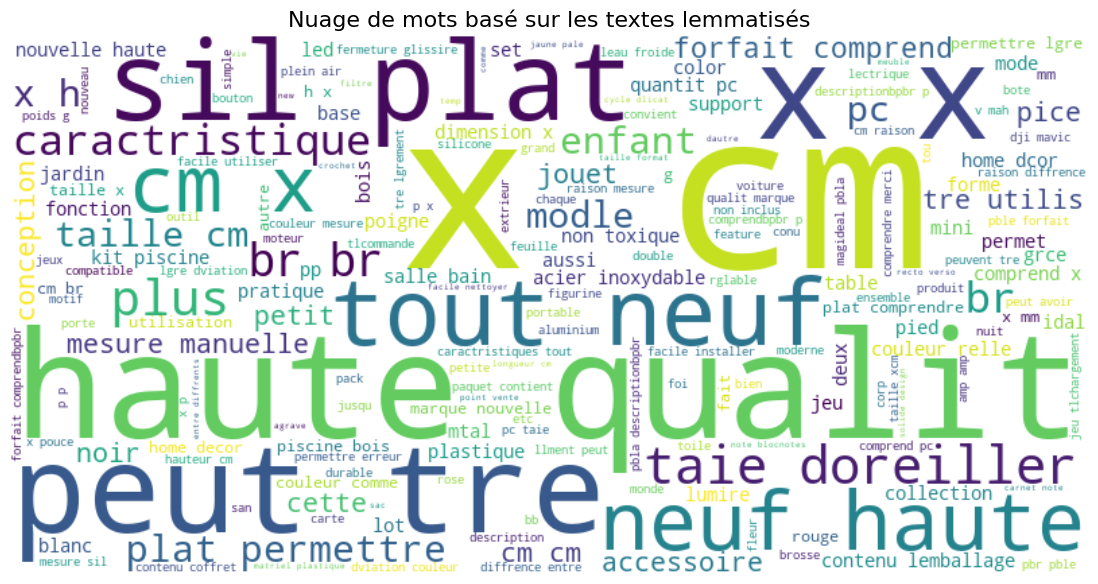

In [9]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# On concatène tous les textes lemmatisés
all_text = " ".join(df_vecteur['merged_trad_lemmatized'])

# Création du nuage
wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='viridis').generate(all_text)

# Affichage
plt.figure(figsize=(15, 7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Nuage de mots basé sur les textes lemmatisés", fontsize=16)
plt.show()


In [10]:
vectorizer = CountVectorizer(ngram_range=(1, 2), min_df=2)  # on ajoute les bigrams et ignore les tokens rares
X_vect = vectorizer.fit_transform(df_vecteur['merged_trad_cleaned'])


In [11]:
y = df_vecteur['category_name']

X_train, X_test, y_train, y_test = train_test_split(X_vect, y, test_size=0.2, random_state=42)

model = LinearSVC()
model.fit(X_train, y_train)


c:\Users\dunca\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\svm\_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


LinearSVC()

In [12]:
y_pred = model.predict(X_test)

print("=== Rapport de classification ===")
print(classification_report(y_test, y_pred))

print("=== Matrice de confusion ===")
print(confusion_matrix(y_test, y_pred))


=== Rapport de classification ===
                                                        precision    recall  f1-score   support

                                    Accessoires gaming       0.74      0.74      0.74       102
                                            Animalerie       0.75      0.62      0.68        48
                                        Cartes de jeux       0.82      0.83      0.83       163
                     Chaussettes bébés, petites photos       0.89      0.87      0.88        38
                                            Confiserie       0.79      0.69      0.74        45
                                      Consoles de jeux       0.85      0.80      0.82        44
                                            Décoration       0.70      0.73      0.72       304
                            Figurines et jeux de rôles       0.50      0.37      0.42        46
                         Figurines, objets pop culture       0.65      0.66      0.66       133
     

In [13]:
import numpy as np

feature_names = vectorizer.get_feature_names_out()
coeffs = model.coef_

# Pour chaque classe (si multiclasses)
for i, class_label in enumerate(model.classes_):
    top10 = np.argsort(coeffs[i])[-10:]
    print(f"\nTop mots pour la classe '{class_label}':")
    print([feature_names[j] for j in top10])



Top mots pour la classe 'Accessoires gaming':
['dsi', 'notice remplacement', 'indestructible', 'carte mmoire', 'gamer', 'skylanders', 'manette', 'hori', 'kinect xbox', 'stylet']

Top mots pour la classe 'Animalerie':
['distributeur nourriture', 'boulet', 'nourriture', 'cross', 'croquette', 'harnais', 'stick', 'tan', 'zolux', 'laisse']

Top mots pour la classe 'Cartes de jeux':
['panini', 'mirrodin', 'dition', 'phyrexia', 'commune', 'gladiator', 'apocalypse', 'revised', 'yugioh', 'mtg']

Top mots pour la classe 'Chaussettes bébés, petites photos':
['aramith', 'magideal', 'toile luxe', 'housse toile', 'malette', 'procds', 'longoni', 'billard', 'professionnal', 'baby foot']

Top mots pour la classe 'Confiserie':
['ederki', 'vert menthe', 'menthe', 'sardine', 'piment', 'miel', 'lorange', 'pistache', 'noix', 'flacon']

Top mots pour la classe 'Consoles de jeux':
['nintendo gamecube', 'thief', 'ere', 'creed brotherhood', 'brotherhood', 'gnration', 'sony', 'sony playstation', 'console', 'boy